In [1]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from name_params import *
from flamelet_integration import *

In [2]:
dir_name = 'flamelets'
file_suffix = 'csv'

chi = np.zeros(1)
T = np.zeros(1)

os.chdir(dir_name)
for filename in glob.glob('.'.join(['*', file_suffix])):
    params = name2params( filename[:-1-len(file_suffix)] )
    chi = np.append(chi, params['chi'])
    T = np.append(T, params['T'])
os.chdir('..')

chi = np.delete( chi, 0, 0 )
T = np.delete( T, 0, 0 )

In [3]:
idx = np.argsort( T )[::-1]

In [4]:
T = T[idx]
chi = chi[idx]

In [5]:
list_delete = []
difTLimit = 10.
latest_T = T[0] + difTLimit
for i, v in enumerate(T):
    if latest_T - v >= difTLimit :
        latest_T = v
    else:
        list_delete.append(i)
        
for i in list_delete:
    params = {'chi':chi[i],'T':T[i]}
    filename = params2name(params)
    os.remove('{}/{}.csv'.format(dir_name,filename))

In [6]:
T

array([2222., 2222., 2222., 2222., 2222., 2222., 2222., 2222., 2222.,
       2222., 2222., 2222., 2222., 2222., 2222., 2222., 2222., 2222.,
       2222., 2222., 2222., 2222., 2222., 2222., 2222., 2222., 2222.,
       2221., 2221., 2221., 2221., 2220., 2219., 2218., 2216., 2214.,
       2211., 2208., 2203., 2197., 2192., 2183., 2175., 2168., 2155.,
       2145., 2132., 2120., 2108., 2092., 2079., 2066., 2032., 2019.,
       2000., 1987., 1963., 1950., 1926., 1907., 1886., 1865., 1843.,
       1820., 1798., 1766., 1743., 1722., 1699., 1676., 1653., 1629.,
       1605., 1580., 1557., 1533., 1510., 1486., 1463., 1439., 1418.,
       1395., 1376., 1356., 1339., 1322., 1303., 1283., 1261., 1238.,
       1213., 1189., 1170., 1142., 1115., 1090., 1068., 1044., 1024.,
       1002.,  973.,  952.,  931.,  905.,  887.,  855.,  836.,  812.,
        796.,  794.,  737.,  721.,  680.,  666.,  621.,  619.,  564.,
        547.,  517.,  506.,  487.,  480.,  461.,  455.,  441.,  437.,
        433.,  430.,

In [7]:
T = np.delete(T, list_delete)
chi = np.delete(chi, list_delete)

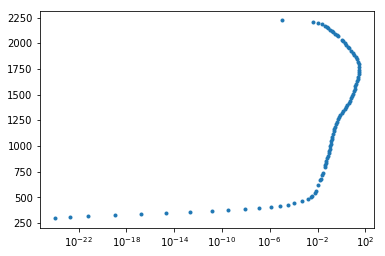

In [8]:
plt.semilogx(chi, T, '.')

In [9]:
T

array([2222., 2211., 2197., 2183., 2168., 2155., 2145., 2132., 2120.,
       2108., 2092., 2079., 2066., 2032., 2019., 2000., 1987., 1963.,
       1950., 1926., 1907., 1886., 1865., 1843., 1820., 1798., 1766.,
       1743., 1722., 1699., 1676., 1653., 1629., 1605., 1580., 1557.,
       1533., 1510., 1486., 1463., 1439., 1418., 1395., 1376., 1356.,
       1339., 1322., 1303., 1283., 1261., 1238., 1213., 1189., 1170.,
       1142., 1115., 1090., 1068., 1044., 1024., 1002.,  973.,  952.,
        931.,  905.,  887.,  855.,  836.,  812.,  796.,  737.,  721.,
        680.,  666.,  621.,  564.,  547.,  517.,  506.,  487.,  461.,
        441.,  430.,  419.,  409.,  398.,  388.,  378.,  368.,  358.,
        348.,  338.,  328.,  318.,  308.,  298.])

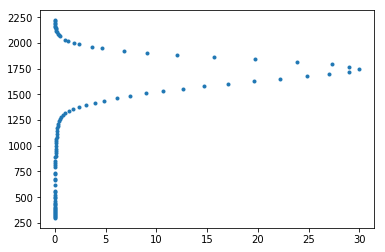

In [12]:
plt.plot(chi,T,'.')

In [13]:
idx_flamelet = 0
params = {'chi':chi[idx_flamelet], 'T':T[idx_flamelet]}
filename = params2name(params)
flamelet = np.genfromtxt('{}/{}.csv'.format(dir_name,filename), names=True, delimiter=',')

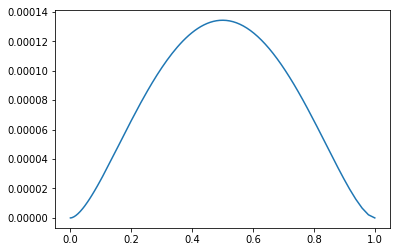

In [15]:
plt.plot(flamelet['Z'],flamelet['chi'])